In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set style
sns.set_theme(style="whitegrid")

# Parameter
algo = 'dots' # Can be 'dots', 'dp'

# Load Data for Points Plot (algo_points.csv)
points_file = f'{algo}_points.csv'
df_points = pd.read_csv(points_file)
# Normalize columns if needed (dots_points.csv seems to have standard names)
# Remove rows with any -1 values (failed runs)
df_points = df_points[~(df_points == -1).any(axis=1)]

# Load Data for Dist Plot (algo_frechet.csv)
frechet_file = f'{algo}_frechet.csv'
df_frechet = pd.read_csv(frechet_file)
# Rename columns for frechet file
df_frechet = df_frechet.rename(columns={'best_points': 'simp_points', 'best_simp_dist': 'simp_dist'})
# Remove rows with any -1 values (failed runs)
df_frechet = df_frechet[~(df_frechet == -1).any(axis=1)]

print(f"Loaded {points_file} and {frechet_file}")
display(df_points.head())
display(df_frechet.head())

# Basic Summary
print("Points Dataset Summary:")
display(df_points.describe())
print("Frechet Dataset Summary:")
display(df_frechet.describe())

Loaded dots_points.csv and dots_frechet.csv


,id,delta,epsilon,baseline_dist,simp_dist,baseline_points,simp_points
0,7,1.064143,0.5,1.596214,1.509882,385,326
1,4,11.860031,0.5,17.790047,16.777295,136,104
2,6,14.323947,0.5,21.485921,20.261949,405,244
3,3,14.194698,0.5,21.292048,20.079181,650,464
4,9,13.712736,0.5,20.569104,19.397716,557,444


,id,best_delta,epsilon,baseline_dist,simp_dist,baseline_points,simp_points
0,4,11.860031,0.5,17.790047,16.777295,136,104
1,6,11.459158,0.5,21.485921,16.280813,405,260
2,1,7.551141,0.5,17.697987,10.702742,206,188
3,13,6.727888,0.5,10.091831,9.519650,337,310
4,12,5.068545,0.5,14.849252,7.171575,174,174


Points Dataset Summary:


,id,delta,epsilon,baseline_dist,simp_dist,baseline_points,simp_points
count,47.000000,47.000000,47.0,47.000000,47.000000,47.000000,47.00000
mean,39.829787,11.538550,0.5,17.307825,16.340879,593.829787,414.00000
std,25.498780,3.234808,0.0,4.852212,4.584460,421.514831,284.44515
min,1.000000,0.000013,0.5,0.000020,0.000027,2.000000,2.00000
25%,18.500000,10.477173,0.5,15.715760,14.879590,219.000000,137.00000
50%,37.000000,12.527251,0.5,18.790877,17.720445,535.000000,402.00000
75%,57.500000,13.742388,0.5,20.613581,19.515782,790.000000,607.00000
max,92.000000,14.854887,0.5,22.282330,21.010000,1729.000000,1164.00000


Frechet Dataset Summary:


,id,best_delta,epsilon,baseline_dist,simp_dist,baseline_points,simp_points
count,47.000000,47.000000,47.0,47.000000,47.000000,47.000000,47.000000
mean,39.829787,7.934389,0.5,17.307825,11.252315,593.829787,470.468085
std,25.498780,4.347064,0.0,4.852212,6.171547,421.514831,319.668092
min,1.000000,0.000013,0.5,0.000020,0.000027,2.000000,2.000000
25%,18.500000,4.541732,0.5,15.715760,6.438832,219.000000,190.000000
50%,37.000000,6.957282,0.5,18.790877,9.842871,535.000000,434.000000
75%,57.500000,11.537919,0.5,20.613581,16.388676,790.000000,643.000000
max,92.000000,14.854887,0.5,22.282330,21.010000,1729.000000,1458.000000


/var/folders/f3/h4301l8d7hn_1612_5g5hpmw0000gn/T/ipykernel_90337/1755623620.py:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=df_points, x='baseline_points', y='simp_points', palette='viridis', ax=axes[0], s=100)
/var/folders/f3/h4301l8d7hn_1612_5g5hpmw0000gn/T/ipykernel_90337/1755623620.py:14: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=df_frechet, x='baseline_dist', y='simp_dist', palette='viridis', ax=axes[1], s=100)


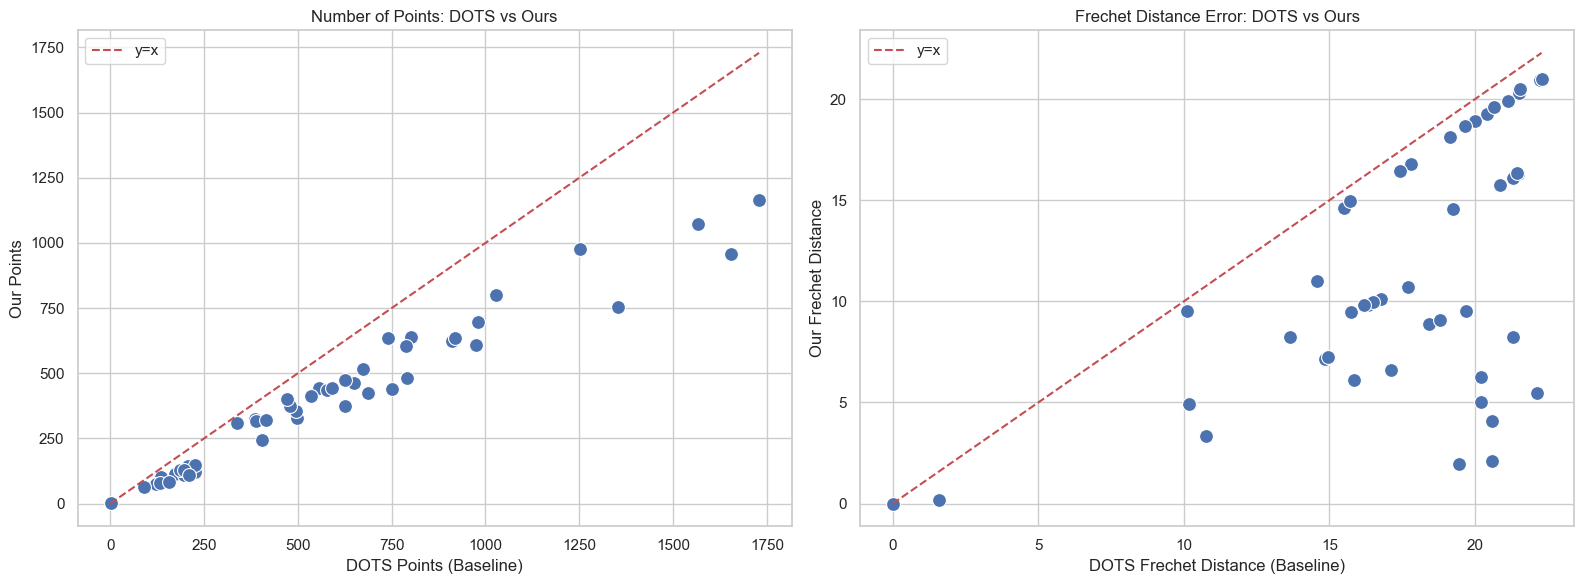

In [16]:
# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Points Comparison (using df_points)
sns.scatterplot(data=df_points, x='baseline_points', y='simp_points', palette='viridis', ax=axes[0], s=100)
max_val = max(df_points['baseline_points'].max(), df_points['simp_points'].max())
axes[0].plot([0, max_val], [0, max_val], 'r--', label='y=x')
axes[0].set_title(f'Number of Points: {algo.upper()} vs Ours')
axes[0].set_xlabel(f'{algo.upper()} Points (Baseline)')
axes[0].set_ylabel('Our Points')
axes[0].legend()

# Plot 2: Error Comparison (using df_frechet)
sns.scatterplot(data=df_frechet, x='baseline_dist', y='simp_dist', palette='viridis', ax=axes[1], s=100)
# Use max from the specific dataframe
max_dist = max(df_frechet['baseline_dist'].max(), df_frechet['simp_dist'].max())
axes[1].plot([0, max_dist], [0, max_dist], 'r--', label='y=x')
axes[1].set_title(f'Frechet Distance Error: {algo.upper()} vs Ours')
axes[1].set_xlabel(f'{algo.upper()} Frechet Distance (Baseline)')
axes[1].set_ylabel('Our Frechet Distance')
axes[1].legend()

plt.tight_layout()
plt.show()